In [2]:
# Installing packages

# Importing Packages
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saving graph pictures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figures(fig_id, tight_layout=True, fig_extension=".png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + fig_extension)
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
os.chdir('.')
print(os.getcwd())
print(os.listdir())

/Users/zachmortenson/Documents/GitHub/vehicle_price_prediction
['data_folder', '.DS_Store', 'images', 'README.md', '.gitattributes', 'prediciton.ipynb', '.ipynb_checkpoints', '.git']


# Get Data

#### Data Source
##### https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

### Retrieve data from file path

In [4]:
def get_data():
    foldersInDir = os.listdir()
    folder_name = [i for i in foldersInDir if i.__contains__('data')][0]
    data_folder_name = os.getcwd() + "/" + folder_name
    data_file_path = data_folder_name + "/" + "Car details v3.csv"
    return pd.read_csv(data_file_path)

# Exploratory Data Analysis

In [5]:
DF_car_data = get_data()
DF_car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
DF_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
DF_car_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
round(DF_car_data.describe(), 2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


In [9]:
# Create a facet grid of all value counts of each variable that is an object
[DF_car_data[i].value_counts() for i in DF_car_data.columns]

[Maruti Swift Dzire VDI                             129
 Maruti Alto 800 LXI                                 82
 Maruti Alto LXi                                     71
 BMW X4 M Sport X xDrive20d                          62
 Maruti Swift VDI                                    61
                                                   ... 
 Skoda Fabia 1.4 TDI Ambiente                         1
 Mahindra Scorpio VLX 2WD AT BSIII                    1
 Renault KWID Climber 1.0 AMT                         1
 Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
 Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
 Name: name, Length: 2058, dtype: int64,
 2017    1018
 2016     859
 2018     807
 2015     776
 2013     670
 2012     651
 2014     621
 2011     592
 2019     583
 2010     394
 2009     246
 2008     214
 2007     183
 2006     124
 2005      97
 2020      74
 2004      62
 2003      49
 2002      27
 2000      22
 1999      18
 1997      11
 2001      10
 1998      10
 1996  

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'selling_price'}>],
       [<AxesSubplot: title={'center': 'km_driven'}>,
        <AxesSubplot: title={'center': 'seats'}>]], dtype=object)

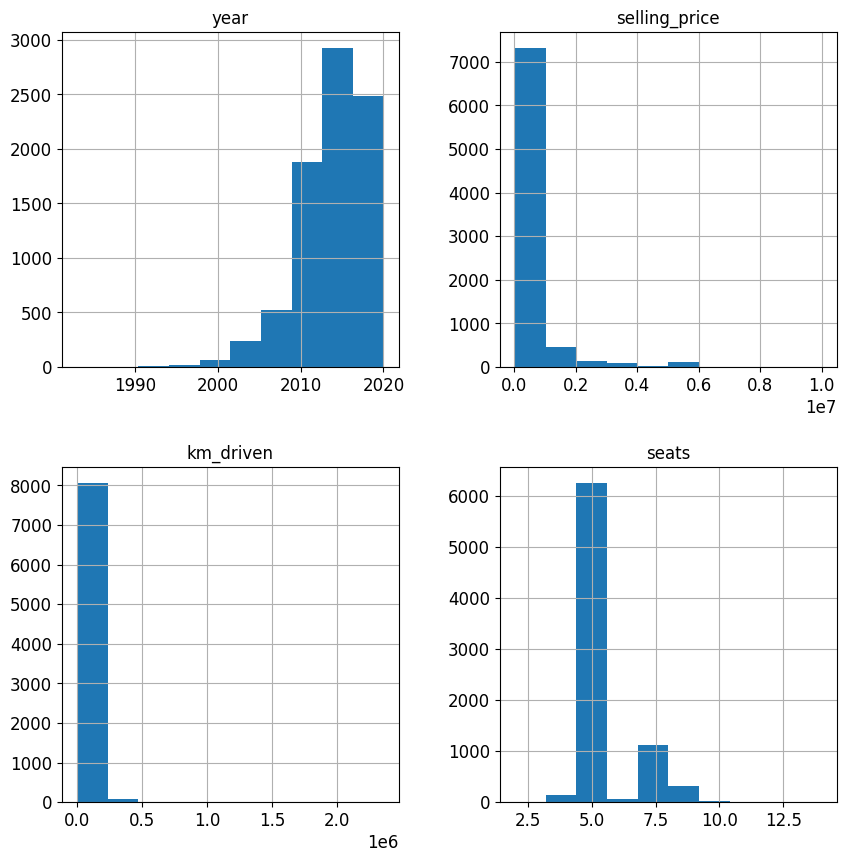

In [10]:
%matplotlib inline
DF_car_data.hist(figsize=(10,10))

# Formatting Data
###  

### Removing NA Values

In [11]:
DF_car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
# Dropping NA rows all together
DF_car_data = DF_car_data.dropna()

#Resetting indicies
DF_car_data.reset_index()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### Renaming Columns

In [13]:
DF_car_data.rename(columns={'mileage':'mileage_kmpl', 'engine':'engine_cc', 'max_power':'max_power_bhp'}, inplace=True, errors='ignore')

### Cleaning up Columns [mileage_kmpl, engine_cc, max_power_bhp, name to brand_of_car]

In [14]:
# Cleaning columns to turn into Floats
DF_car_data['mileage_kmpl']=  DF_car_data['mileage_kmpl'].str.split().str[0]
DF_car_data['engine_cc']=  DF_car_data['engine_cc'].str.split().str[0]
DF_car_data['max_power_bhp']=  DF_car_data['max_power_bhp'].str.split().str[0]

In [15]:
DF_car_data.max_power_bhp.str.contains('[A-Z]', regex=True).value_counts()

False    7906
Name: max_power_bhp, dtype: int64

In [16]:
# Converting Data Types
DF_car_data: pd.DataFrame = DF_car_data.astype({
            'mileage_kmpl' : float,
            'engine_cc' : float,
            'max_power_bhp' : float, 
})

In [17]:
# Converting "Name" to a brand column
DF_car_data['name'] = DF_car_data['name'].str.split().str[0]
DF_car_data['name'].value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64

In [18]:
# Dropping toruqe column (Many errors 
# and too much variability to parse through to clean the column)
print(DF_car_data.torque.str.split())
DF_car_data.drop('torque', axis=1, inplace=True)

0                   [190Nm@, 2000rpm]
1              [250Nm@, 1500-2500rpm]
2           [12.7@, 2,700(kgm@, rpm)]
3       [22.4, kgm, at, 1750-2750rpm]
4           [11.5@, 4,500(kgm@, rpm)]
                    ...              
8123              [113.7Nm@, 4000rpm]
8124    [24@, 1,900-2,750(kgm@, rpm)]
8125                [190Nm@, 2000rpm]
8126           [140Nm@, 1800-3000rpm]
8127           [140Nm@, 1800-3000rpm]
Name: torque, Length: 7906, dtype: object


               name  year  selling_price  km_driven    fuel seller_type  \
170           Volvo  2017       10000000      30000  Petrol  Individual   
2938            BMW  2020        7200000       5000  Diesel  Individual   
4952           Audi  2019        6523000      23600  Petrol      Dealer   
4950           Audi  2019        6223000       7800  Petrol      Dealer   
136   Mercedes-Benz  2017        6000000      37000  Diesel      Dealer   
1071            BMW  2018        6000000      28156  Diesel      Dealer   
4101            BMW  2018        6000000      28156  Diesel      Dealer   
4766            BMW  2018        6000000      27000  Diesel      Dealer   
5258  Mercedes-Benz  2017        6000000      37000  Diesel      Dealer   
7713  Mercedes-Benz  2017        6000000      37000  Diesel      Dealer   

     transmission           owner  mileage_kmpl  engine_cc  max_power_bhp  \
170     Automatic     First Owner         42.00     1969.0         400.00   
2938    Automatic   

<AxesSubplot: >

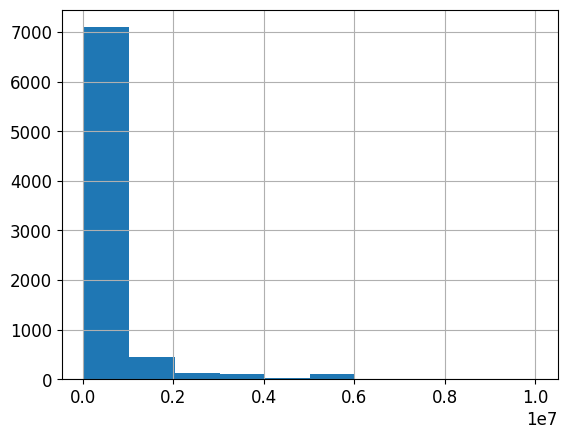

In [19]:
# Looking at distribution of the dependant variable
print(DF_car_data.nlargest(10, 'selling_price'))
DF_car_data.selling_price.hist()
# 10_000_000

# Creating a test set

### Creating stratified sampling for the predictor value 'selling_price' 

In [20]:
# Random seed 
np.random.seed(180)

In [21]:
# The selling price of the cars is not in USD (it is potentially in some Indian Currency)
DF_car_data['selling_price_cat'] = pd.cut(DF_car_data['selling_price'],
                                            bins=[0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, np.inf],
                                            labels=['250k','500k', '750k','1m', '1.25m','1.5m', '1.75m','2m', '2m+' ])

In [22]:
DF_car_data.selling_price_cat.value_counts()

500k     2564
750k     1969
250k     1867
1m        687
2m+       356
1.25m     192
1.5m      100
2m         90
1.75m      81
Name: selling_price_cat, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF_car_data, test_size=0.2, random_state=180)

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=180)

# Printing test results
# list(split.split(DF_car_data, DF_car_data['selling_price_cat']))

for train_index, test_index in split.split(DF_car_data, DF_car_data['selling_price_cat']):
    strat_train_set = DF_car_data.iloc[train_index]
    strat_test_set = DF_car_data.iloc[test_index]

In [25]:
def selling_price_cat_proportions(data):
    return data['selling_price_cat'].value_counts()/len(data)

compare_proportions = pd.DataFrame({
    'overall' : selling_price_cat_proportions(DF_car_data),
    'stratified' : selling_price_cat_proportions(strat_test_set),
    'random' : selling_price_cat_proportions(test_set)
}).sort_values('overall')

compare_proportions['error%_strat'] = 100 * compare_proportions['stratified']/compare_proportions['overall'] - 100
compare_proportions['error%_random'] = 100* compare_proportions['random']/compare_proportions['overall'] - 100

In [26]:
compare_proportions

,overall,stratified,random,error%_strat,error%_random
1.75m,0.010245,0.010114,0.009482,-1.284512,-7.454230
2m,0.011384,0.011378,0.013274,-0.050569,16.607670
1.5m,0.012649,0.012642,0.013906,-0.050569,9.944374
1.25m,0.024285,0.024020,0.025284,-1.091709,4.113991
2m+,0.045029,0.044880,0.042984,-0.331326,-4.542678
1m,0.086896,0.087231,0.091024,0.385891,4.750495
250k,0.236150,0.236410,0.233249,0.110035,-1.228334
750k,0.249051,0.249052,0.262326,0.000193,5.330152
500k,0.324311,0.324273,0.308470,-0.011587,-4.884317


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('selling_price_cat', axis=1, inplace=True)

/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_1812/3516833356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('selling_price_cat', axis=1, inplace=True)
/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_1812/3516833356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('selling_price_cat', axis=1, inplace=True)


# Exploratory Analysis on Training Data

In [28]:
# Looking for Correlations
corr_matrix = strat_train_set.select_dtypes(include=['int64', 'int', 'float']).corr()
corr_matrix

,year,selling_price,km_driven,mileage_kmpl,engine_cc,max_power_bhp,seats
year,1.000000,0.413343,-0.419287,0.329573,0.005170,0.218182,-0.018584
selling_price,0.413343,1.000000,-0.216551,-0.142462,0.454846,0.746102,0.044076
km_driven,-0.419287,-0.216551,1.000000,-0.164970,0.203768,-0.035222,0.220767
mileage_kmpl,0.329573,-0.142462,-0.164970,1.000000,-0.582475,-0.385586,-0.446679
engine_cc,0.005170,0.454846,0.203768,-0.582475,1.000000,0.700770,0.613290
max_power_bhp,0.218182,0.746102,-0.035222,-0.385586,0.700770,1.000000,0.188883
seats,-0.018584,0.044076,0.220767,-0.446679,0.613290,0.188883,1.000000


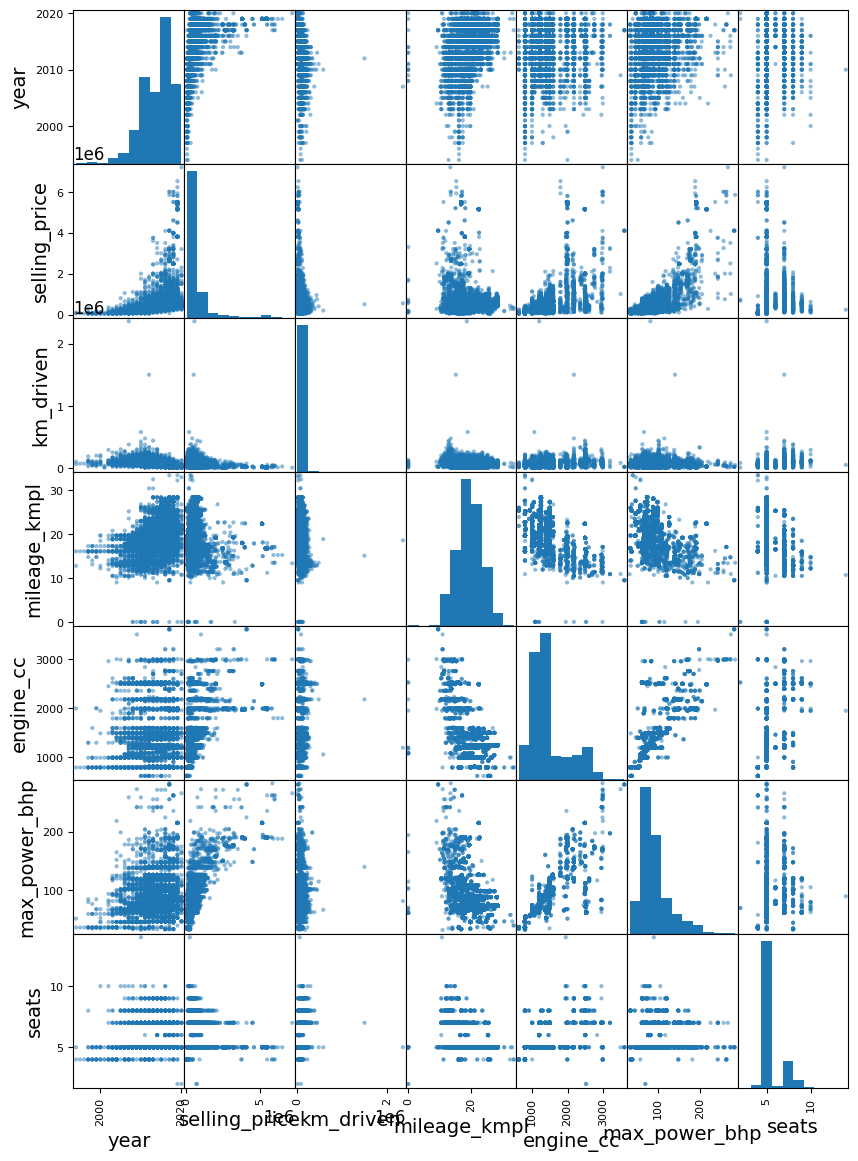

In [29]:
from pandas.plotting import scatter_matrix

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

attribs = strat_train_set.select_dtypes(include=numerics).columns

scatter_matrix(strat_train_set[attribs], figsize=(10,14));


## Handling Text and Categorical Data

In [30]:
# DF_car_data.columns
strat_train_set.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage_kmpl', 'engine_cc', 'max_power_bhp',
       'seats'],
      dtype='object')

#### Processing **`owner`**, **`seats`** to ordinal type
#### Processing **`fuel`**, **`transmission`**, **`seller_type`** to be categorical

In [45]:
# Categorizing nominal variables
# Sklearn documentation states that ordinalencoding should be used for features while labelencoding should be only used for tagret variable
# you can call fit and transform seperatley for tranforming vars with many of the sklearn functions
# https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

from sklearn.preprocessing import OrdinalEncoder

# Define encoding
ordencoder = OrdinalEncoder()

strat_train_set[['owner', 'seats', 'fuel', 'seller_type']] = ordencoder.fit_transform(strat_train_set[['owner', 'seats', 'fuel', 'seller_type']])

# Tranmission has no inherant order so create a dummy var (onehotencoder for this one)
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(drop='first', sparse=False)

onehotencoded = onehot.fit_transform(strat_train_set[['transmission']])

strat_train_set['transmission'] = onehotencoded



/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_1812/5522495.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_train_set[['owner', 'seats', 'fuel', 'seller_type']] = ordencoder.fit_transform(strat_train_set[['owner', 'seats', 'fuel', 'seller_type']])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_1812/5522495.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [46]:
test= []
for i in onehotencoded.tolist():
    test.append(tuple(i))
set(test)

{(0.0,), (1.0,)}

In [47]:
ordencoder.categories_

[array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2.])]

# Select and train a model

In [48]:
dependant_vars = strat_train_set[['selling_price']]
# strat_train_set_dependant_vars
independant_vars = strat_train_set.loc[: , strat_train_set.columns != 'selling_price']
# strat_train_set_indep_vars

In [49]:
print(len(strat_train_set))
print(max(strat_train_set.index))

6324
8127


In [50]:
independant_vars_test = independant_vars.drop(columns='name')

In [51]:
independant_vars_test.transmission.unique()

array([1., 0.])

### training and evaluating on the Training set

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(independant_vars_test, dependant_vars)

LinearRegression()

In [53]:
selling_predicitions = lin_reg.predict(independant_vars_test)

# Testing MSE + RMSE
lin_mse = mean_squared_error(dependant_vars, selling_predicitions)
lin_rmse = np.sqrt(lin_mse)
print(f'RMSE output: {round(lin_rmse,2)}')

# Testing MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(dependant_vars, selling_predicitions)
print(f'MAE output: {round(lin_mae,2)}')

RMSE output: 456001.78
MAE output: 271885.68


### Notes for 01/18/2023
- Utilized sklearns linear models package to get linear regression fucntions
- Trained the linear regression model on the train data
- Calculated MAE and RMSE (MAE produces a better score)
- Dropped `name` column?
- Reset index values after dropping Null records

### To Do:
- Use cross validation for better prediciitons
- Take notes on what cross validation does and how it calculates it score
- Fine tune predictor variables (check if name is in use)
- check correltaion chart and see if any variables are highly correlated

<!-- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb -->


<!-- https://datascience.stackexchange.com/questions/63785/how-to-handle-year-variable-for-machine-learning-models -->

# Calculate R^2: Definition -> r2 = (sumsquares(mean) - sumsquares(fit)) / sumsquares(mean)
# r2 = (sumsquares(selling price) - sumsquares(after taking mileage into account)) / sumsquares(selling price)
# The r2 value telling us how much fo rthe variation in the Y outcome var is explained by the x input var 
# ie variable mileage explains 60% of the variation in selling price

# the more predictor vars added to an equation the more opportunities for random events to reduce sumsquares(fit) and result in a better R2
# adjusted R2 tackles this by adjusting for how many predictor vars are in the equation

# to tell if R2 is significant one must calulate F value (p value but for R2)
# F = variation explained by the extra parameters in the "fit line"/ variation not epxlained by the extra paramters in the "fit line"
# F large is good! then generate P value using F distribution chart


### Using decision tree regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=180)
tree_reg.fit(independant_vars_test, dependant_vars)

DecisionTreeRegressor(random_state=180)

In [56]:
selling_predicitions_tree = tree_reg.predict(independant_vars_test)

# RMSE
tree_mse = mean_squared_error(dependant_vars, selling_predicitions_tree)
tree_rmse = np.sqrt(tree_mse)

# MAE
tree_mae = mean_absolute_error(dependant_vars, selling_predicitions_tree)

print(f'RMSE output: {round(tree_rmse,2)}')
print(f'MAE output: {round(tree_mae,2)}')

RMSE output: 14859.35
MAE output: 3483.77


## Better eval using cross validation

In [ ]:
def display_scores(scores) -> np.array:
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, independant_vars_test, dependant_vars, scoring='neg_mean_squared_error', cv=10)
scores_mae = cross_val_score(tree_reg, independant_vars_test, dependant_vars,scoring='neg_mean_absolute_error', cv=10 )

# Must negate scores as you can not sqrt a negative number
tree_rmse_scores = np.sqrt(-scores)
tree_mae_scores = np.sqrt(-scores_mae)

lin_scores = cross_val_score(lin_reg, independant_vars_test, dependant_vars, scoring='neg_mean_squared_error', cv=10)

# Must negate scores as you can not sqrt a negative number
lin_rmse_scores = np.sqrt(-lin_scores)

In [76]:
display_scores(tree_rmse_scores)

Scores: [154793.37400094 187280.29008011 164167.42247005 139224.26256251
 165962.60511876 153506.3441621  216934.25347761 164911.95537326
 200683.20048226 177246.78812458]
Mean: 172471.04958521703
Standard deviation: 22273.262743417654


In [77]:
display_scores(tree_mae_scores)

Scores: [280.58776294 289.61123983 274.8698979  279.91335924 290.07183525
 278.54498594 312.07622624 275.91352818 293.91475101 300.12681161]
Mean: 287.5630398150473
Standard deviation: 11.379378071782785


In [78]:
display_scores(lin_rmse_scores)

Scores: [470574.11318132 436296.00269119 426616.48468452 376769.84399029
 496903.18021279 469048.8892588  463127.196894   481397.75836457
 445743.82390279 510987.74795301]
Mean: 457746.5041133271
Standard deviation: 36577.29680198754


### Notes for 01/19/2023
- Tested several models and model eval metrics
- Tree regressor seems to work best for RMSE and MAE
- Reviewed R2 nd F stat definitions
- Used Crossval to test models with many different tests , got avg scores and stdev of scores

### To Do:
- Research how regressor trees work
- Look up scoring parameter arguments for cross_value_score scoring function
- Use random forest and SVM models get MAE and RMSE
- Clean up code
- Test grid search understand why it is implimented